In [14]:
import pandas as pd
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Visualization
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("dataset.csv")
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [16]:
print(df.columns)


Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')


In [17]:
df.columns = df.columns.str.strip()


In [18]:
print(df.columns.tolist())


['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp', 'crypto_name', 'date']


In [19]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [20]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.set_index('date', inplace=True)


In [22]:
df['MA_7']  = df['close'].rolling(window=7).mean()
df['MA_14'] = df['close'].rolling(window=14).mean()
df['MA_30'] = df['close'].rolling(window=30).mean()


In [23]:
df['Volatility_7']  = df['close'].rolling(window=7).std()
df['Volatility_14'] = df['close'].rolling(window=14).std()
df['Volatility_30'] = df['close'].rolling(window=30).std()


In [25]:
if 'Market Cap' in df.columns:
    df['Liquidity_Ratio'] = df['volume'] / df['marketcap']
else:
    df['Liquidity_Ratio'] = df['volume'] / df['close']  # fallback approximation


In [26]:
df['BB_Middle'] = df['close'].rolling(20).mean()
df['BB_Std'] = df['close'].rolling(20).std()
df['BB_Upper'] = df['BB_Middle'] + (df['BB_Std'] * 2)
df['BB_Lower'] = df['BB_Middle'] - (df['BB_Std'] * 2)


In [30]:
df['H-L'] = df['high'] - df['low']
df['H-PC'] = abs(df['high'] - df['close'].shift(1))
df['L-PC'] = abs(df['low'] - df['close'].shift(1))
df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1)
df['ATR'] = df['TR'].rolling(window=14).mean()


In [31]:
df['ATRP'] = (df['ATR'] / df['close']) * 100


In [32]:
df['Target'] = df['close'].shift(-1)


In [33]:
df = df.dropna()
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,MA_7,...,BB_Std,BB_Upper,BB_Lower,H-L,H-PC,L-PC,TR,ATR,ATRP,Target
date,,,,,,,,,,,,,,,,,,,,,
2013-05-19,29,123.210999,124.500000,119.570999,121.989998,0.0,1.363205e+09,2013-05-19T23:59:59.999Z,Bitcoin,54.458090,...,58.884587,178.279722,-57.258625,4.929001,121.196510,116.267509,121.196510,100.493471,82.378451,122.000000
2013-05-20,30,122.500000,123.621002,120.120003,122.000000,0.0,1.363710e+09,2013-05-20T23:59:59.999Z,Bitcoin,71.469644,...,59.137041,179.024631,-57.523534,3.500999,1.631004,1.869995,3.500999,100.443614,82.330831,3.181760
2013-05-20,31,3.314850,3.323340,3.150050,3.181760,0.0,5.668275e+07,2013-05-20T23:59:59.999Z,Litecoin,54.350610,...,59.150410,179.038290,-57.563351,0.173290,118.676660,118.849950,118.849950,100.734249,3165.991366,3.086750
2013-05-21,32,3.193260,3.215970,3.040910,3.086750,0.0,5.507303e+07,2013-05-21T23:59:59.999Z,Litecoin,54.336418,...,59.027403,173.184463,-62.925148,0.175060,0.034210,0.140850,0.175060,92.423885,2994.213454,122.879997
2013-05-21,33,122.019997,123.000000,121.209999,122.879997,0.0,1.374013e+09,2013-05-21T23:59:59.999Z,Bitcoin,71.419999,...,59.557551,180.221311,-58.008893,1.790001,119.913250,118.123249,119.913250,93.223203,75.865238,123.889000


In [38]:
features = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
X = df[features]
y = df['close']   # or whatever your target is


In [40]:
X_train.dtypes
X_train = X_train.select_dtypes(include='number')
X_test  = X_test.select_dtypes(include='number')


In [39]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [42]:
model = RandomForestRegressor(
    n_estimators=100,      
    max_depth=6,           
    n_jobs=-1,             
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [44]:
y_pred = model.predict(X_test)


In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("MAE  :", mae)
print("R²   :", r2)


RMSE : 8461.892742020897
MAE  : 3632.2702820501604
R²   : -0.009586022570759356


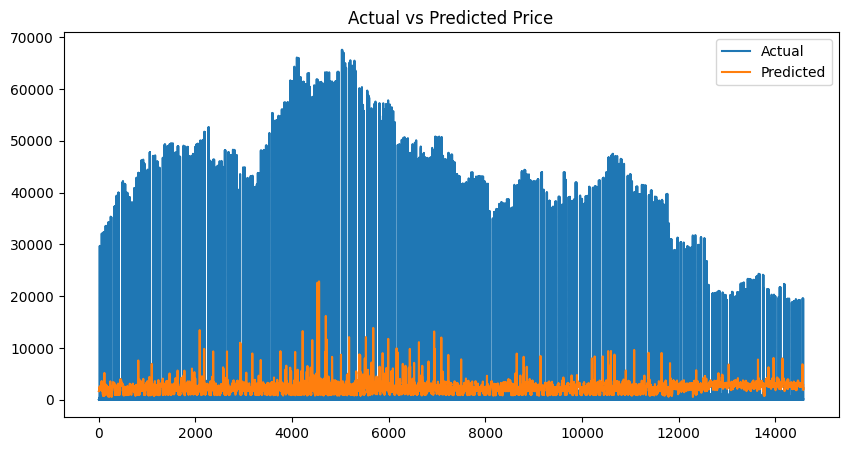

In [46]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Price")
plt.show()
